${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\operatorname {exp} \left(-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}\right)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}\quad -\infty <x<\infty }$





In [2]:
#import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

saveas = 'pdf'
figuresize = (7,5)
if saveas == 'pgf':
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })
else:
    plt.rc('text', usetex=True)
    #plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    ## for Palatino and other serif fonts use:
    #rc('font',**{'family':'serif','serif':['Palatino']})
    #plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
    plt.rc('font',**{'family':'serif','serif':['DejaVu Sans']})
    # hfont = {'fontname':'Computer Modern Roman'}

size = 100 #number of x 
x_min = math.ceil(-size/2)
x_max = math.floor(size/2)

n = x_max - x_min + 1
index = np.arange(n)
x = np.arange(x_min, x_max+1)

In [3]:
f = np.zeros(shape=(n)) # data
f[(np.arange(-10, 11)+math.ceil(size/2))] = 1
f = f/np.sum(f)

mean = 0
sig = 10
p = np.zeros(shape=(n)) # optimized sampling distribution
for i in index:
    p[i] = math.exp(-math.pow((x[i]-mean)/sig,2)/2)
p = p/np.sum(p)
    

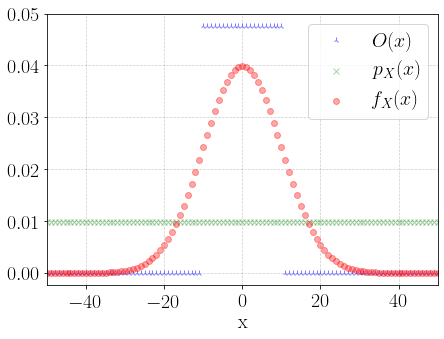

In [6]:
norm = 0
for i in index:
    norm += f[i]
f_norm = np.true_divide(f , norm)

px = np.full(x.shape,1/n)

plt.figure(figsize=figuresize)
plt.rcParams.update({'font.size': 20})

plt.plot(x, f, 'b2', alpha=0.5, label='$O(x)$')
plt.plot(x, px, 'gx', alpha=0.35, label='$p_X(x)$')
plt.plot(x, p, 'ro', alpha=0.35, label='$f_X(x)$')
plt.legend()
plt.xlabel('x')
plt.xlim(x[0], x[-1])
plt.grid(color='black', alpha=0.2, linestyle='--', linewidth=0.7)
plt.savefig('ex_inv/ex_dist.{0}'.format(saveas))
plt.show()

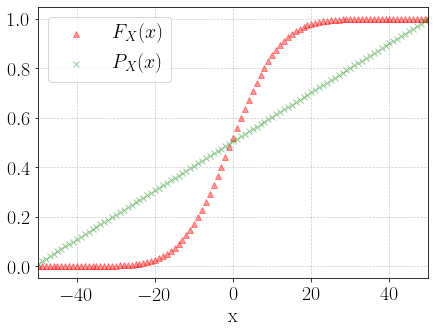

In [13]:
cdf = np.cumsum(p)
cdff= np.cumsum(px)

plt.figure(figsize=figuresize)
plt.rcParams.update({'font.size': 20})

# plt.plot(x, p, 'ro', alpha=0.2, label='$f_X(x)$')
# plt.plot(x, px, 'g2', alpha=0.2, label='$p_X(x)$')
plt.plot(x, cdf, 'r^', label='$F_X(x)$', alpha=0.4)
plt.plot(x, cdff, 'gx', label='$P_X(x)$', alpha=0.4)
plt.legend()
plt.xlabel('x')
plt.xlim(x[0], x[-1])
plt.grid(color='black', alpha=0.2, linestyle='--', linewidth=0.7)
plt.savefig('ex_inv/ex_cdf.{0}'.format(saveas))
plt.show()

(4, 200)
average x: 0.728316
mean: 0.009900990099009901 vs [0.01000744 0.00936758 0.00962237 0.0097074 ]
delta mean: [ 0.00010645 -0.00053341 -0.00027862 -0.00019359]


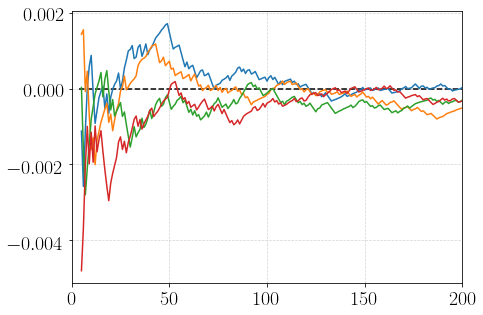

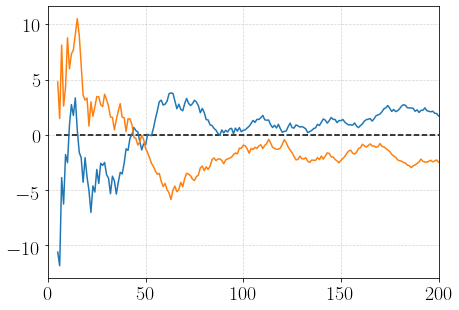

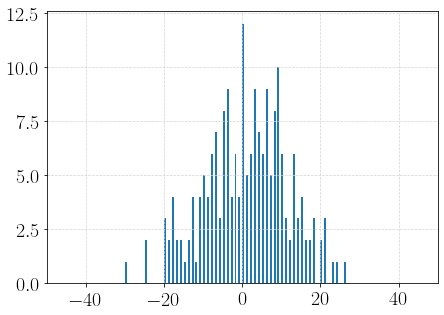

In [41]:
nSample = 200
nruns = 4
smp_x = [[] for i in range(nruns)]
smp = [[] for i in range(nruns)]

means = [[] for i in range(nruns)]

amount = [np.zeros(n) for i in range(nruns)]



for i in range(nruns):
    for j in range(nSample):
        idx = np.nonzero((cdf-np.random.random_sample()).clip(min=0))[0][0]
        smp_x[i].append(idx)
        amount[i][idx] += 1
        smp[i].append(f[idx]*(1/(x_max-x_min+1)/p[idx]))
        means[i].append(np.mean(smp[i]))

meanx_nv1 = np.divide(np.cumsum(np.floor(n*np.random.random_sample((nSample,)))+x_min),np.arange(nSample)+1)
meanx_nv2 = np.divide(np.cumsum(np.floor(n*np.random.random_sample((nSample,)))+x_min),np.arange(nSample)+1)
        
        

print(np.array(smp).shape)
cutoff = 4
meanx_nv1 = meanx_nv1[cutoff:]
meanx_nv2 = meanx_nv2[cutoff:]
smp_x = np.array(smp_x)[:,cutoff:]
smp = np.array(smp)[:,cutoff:]
means = np.array(means)[:,cutoff:]
nrange = np.arange(cutoff, nSample) + 1

print( "average x: {:f}".format(x_min + np.average(smp_x)))
print('mean:', np.mean(f),'vs', np.mean(smp, axis=1))
print('delta mean:', np.mean(smp, axis=1)-np.mean(f))



plt.figure(figsize=figuresize)
plt.rcParams.update({'font.size': 20})
for i in range(nruns):
    plt.plot(nrange, means[i]-np.mean(f))
plt.xlim(0, nrange[-1])
plt.hlines(0,cutoff, nSample, linestyle = 'dashed')
plt.grid(color='lightgray', linestyle='--', linewidth=0.7)
plt.savefig('ex_inv/ex_mean.{0}'.format(saveas))
plt.show()


plt.figure(figsize=figuresize)
plt.rcParams.update({'font.size': 20})
plt.plot(nrange, meanx_nv1-np.mean(f))
plt.plot(nrange, meanx_nv2-np.mean(f))
plt.xlim(0, nrange[-1])
plt.hlines(0,cutoff, nSample, linestyle = 'dashed')
plt.grid(color='lightgray', linestyle='--', linewidth=0.7)
plt.savefig('ex_inv/ex_mean.{0}'.format(saveas))
plt.show()





plt.figure(figsize=figuresize)
plt.rcParams.update({'font.size': 20})
plt.xlim(x[0], x[-1])
plt.bar(x, amount[0], align='edge',width=0.5)
plt.grid(color='lightgray', linestyle='--', linewidth=0.7)
plt.savefig('ex_inv/ex_amount.{0}'.format(saveas))
plt.show()

4


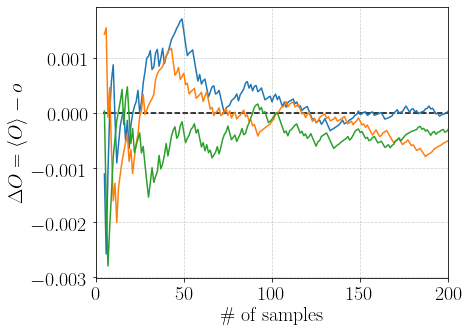

4


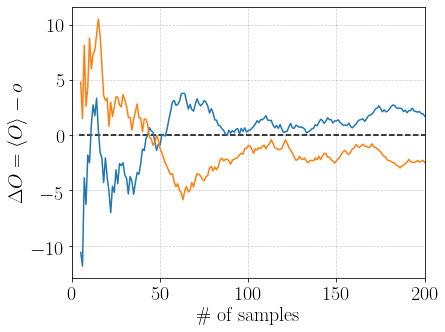

4


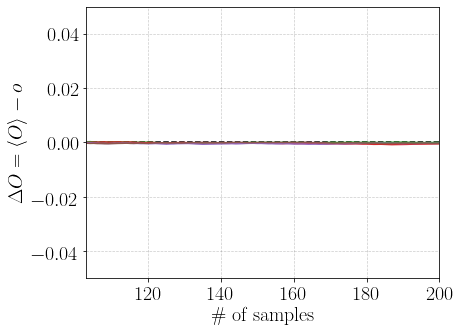

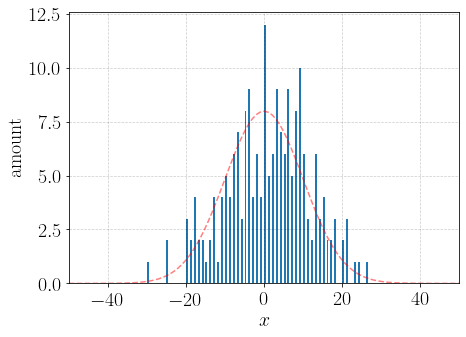

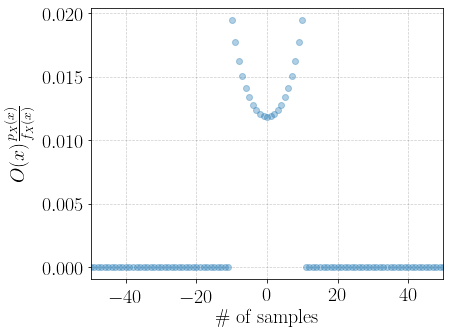

In [43]:
# mean plot
## importance sampling
print(nruns)
plt.figure(figsize=figuresize)
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.gcf().subplots_adjust(left=0.2)
plt.grid(color='black', alpha=0.2, linestyle='--', linewidth=0.7)

for i in range(nruns-1):
    plt.plot(nrange, means[i]-np.mean(f))
plt.hlines(0,cutoff, nSample, linestyle = 'dashed')
plt.ylabel(r'$\Delta O = \langle O \rangle - o$')
plt.xlabel('$\#$ of samples')
plt.xlim(0, nrange[-1])
plt.savefig('ex_inv/ex_mean.{0}'.format(saveas))
plt.show()


## uniform distributed sampling
print(nruns)
plt.figure(figsize=figuresize)
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.gcf().subplots_adjust(left=0.2)
plt.grid(color='black', alpha=0.2, linestyle='--', linewidth=0.7)

plt.plot(nrange, meanx_nv1-np.mean(f))
plt.plot(nrange, meanx_nv2-np.mean(f))
#for i in range(nruns):
#    plt.plot(nrange, means[i]-np.mean(f))
plt.hlines(0,cutoff, nSample, linestyle = 'dashed')
plt.ylabel(r'$\Delta O = \langle O \rangle - o$')
plt.xlabel('$\#$ of samples')
plt.xlim(0, nrange[-1])
plt.savefig('ex_inv/ex_meanNV.{0}'.format(saveas))
plt.show()


## shortend
print(nruns)
xllim = int(len(nrange)/2)
plt.figure(figsize=figuresize)

plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.gcf().subplots_adjust(left=0.2)
plt.grid(color='black', alpha=0.2, linestyle='--', linewidth=0.7)

plt.xlim(nrange[xllim], nrange[-1])
plt.plot(nrange[xllim:], meanx_nv1[xllim:]-np.mean(f))
plt.plot(nrange[xllim:], meanx_nv2[xllim:]-np.mean(f))
for i in range(nruns):
    plt.plot(nrange[xllim:], means[i][xllim:]-np.mean(f))
plt.hlines(0, cutoff, nSample, linestyle = 'dashed')
plt.ylabel(r'$\Delta O = \langle O \rangle - o$')
plt.xlabel('$\#$ of samples')
#plt.autoscale(axis='y')
plt.ylim(-0.05,0.05)
#plt.savefig('ex_inv/ex_meanNV_test.{0}'.format(saveas))
plt.show()



# amount plot

p_soll = np.zeros(shape=(n)) # optimized sampling distribution
for i in index:
    p_soll[i] = math.exp(-math.pow((x[i]-mean)/sig,2)/2)
p_soll = p_soll/np.sum(p_soll)*nSample
    

plt.figure(figsize=figuresize)
plt.rcParams.update({'font.size': 20})
plt.grid(color='black', alpha=0.2, linestyle='--', linewidth=0.7)

plt.plot(x, p_soll, '--r', alpha=0.5)
plt.bar(x, amount[0], align='edge',width=0.5)
plt.ylabel('amount')
plt.xlabel('$x$')
#plt.legend()
plt.xlim(x[0],x[-1])
plt.savefig('ex_inv/ex_amount.{0}'.format(saveas))
plt.show()




# 
plt.figure(figsize=figuresize)
plt.rcParams.update({'font.size': 20})
plt.gcf().subplots_adjust(left=0.2)
plt.grid(color='black', alpha=0.2, linestyle='--', linewidth=0.7)

#plt.semilogy(x, (1/(x_max-x_min+1)/p))
#plt.plot(x, (1/(x_max-x_min+1)/p))
plt.plot(x, (f/(x_max-x_min+1)/p), 'o', alpha=0.35)
plt.ylabel(r'$O(x) \frac{p_X(x)}{f_X(x)}$')
plt.xlabel('$\#$ of samples')
plt.xlim(x[0], x[-1])
plt.savefig('ex_inv/ex_mody.{0}'.format(saveas))
plt.show()

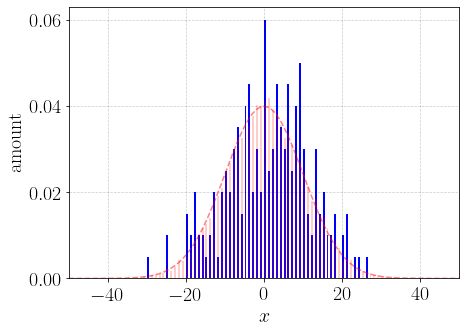

In [56]:
amount_huge = np.zeros(n)
for j in range(nSample*100):
    idx = np.nonzero((cdf-np.random.random_sample()).clip(min=0))[0][0]
    amount_huge[idx] += 1
        
        
# amount plot
p_soll = np.zeros(shape=(n)) # optimized sampling distribution
for i in index:
    p_soll[i] = math.exp(-math.pow((x[i]-mean)/sig,2)/2)
p_soll = p_soll/np.sum(p_soll)
    

plt.figure(figsize=figuresize)
plt.rcParams.update({'font.size': 20})
plt.grid(color='black', alpha=0.2, linestyle='--', linewidth=0.7)

plt.plot(x, p_soll, '--r', alpha=0.5)
plt.bar(x, amount[0]/np.sum(amount[0]), align='edge', color='blue' ,width=0.5)
plt.bar(x, amount_huge/np.sum(amount_huge), alpha= 0.2, align='edge', color='red',width=0.5)
plt.ylabel('amount')
plt.xlabel('$x$')
plt.xlim(x[0],x[-1])
#plt.savefig('ex_inv/ex_amount_huge.{0}'.format(saveas))
plt.show()    


0.009900990099009901